# Plotting eReefs model results

This tutorial is derived from the [similar one in the emsarray-notebooks repository](https://github.com/csiro-coasts/emsarray-notebooks/blob/master/plot.ipynb).  It has been tweaked to use eReefs datasets accessed directly from the data services they have been published to for all the examples, rather than using local data files or datasets from other sources. 

---

## Access the OPeNDAP endpoint URL for your dataset

We begin by discovering the OPeNDAP endpoint URL for the published eReefs dataset that we want to plot variables from.

If you don't know this already, then you can follow [these instructions](./data-discovery.ipynb) to use the CSIRO eReefs data explorer to discover the URL you need.

The URL we are using in these examples is <https://thredds.nci.org.au/thredds/dodsC/fx3/gbr4_bgc_GBR4_H2p0_B3p1_Cfur_Dnrt.ncml>, which is the OPeNDAP endpoint for the [GBR4 Biogeochemistry and Sediments v3.1 near-real-time model results](https://marlin.csiro.au/geonetwork/srv/eng/catalog.search#/metadata/7bc0d1fc-d0e4-4c1a-956f-8f7cd1a6892d).

We will use [emsarray](https://emsarray.readthedocs.io/en/stable/) to help us query this dataset:

In [1]:
import emsarray

# Access the dataset
dataset = emsarray.open_dataset("https://thredds.nci.org.au/thredds/dodsC/fx3/gbr4_bgc_GBR4_H2p0_B3p1_Cfur_Dnrt.ncml")

# Filter the dataset to a selected timestamp and depth
# (In this case, the most recent time and the third-highest depth)
dataset = dataset.isel(time=-1, k=-3)

In [2]:
## Prepare our plotting environment

In [3]:
# This makes the figures nice and big for this notebook
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 100
pyplot.rcParams['figure.figsize'] = (8, 5)
pyplot.rcParams['savefig.dpi'] = 100

In [4]:
# The coastlines used in the maps have some bad polygons,
# which causes some warnings. Lets turn those off.
import shapefile
shapefile.VERBOSE = False

## Plot an eReefs dataset variable on a map

 Plot the `Total Chlorophyll (Chl_a_sum)` variable from our dataset on a map with coastlines overlayed. 
 A colour ramp will be applied and automatically scaled to the range of the data.

 See the [emsarray documentation](https://emsarray.readthedocs.io/en/stable/api/conventions/interface/#emsarray.conventions.Convention.make_poly_collection) for more information about the `make_poly_collection` function called here.

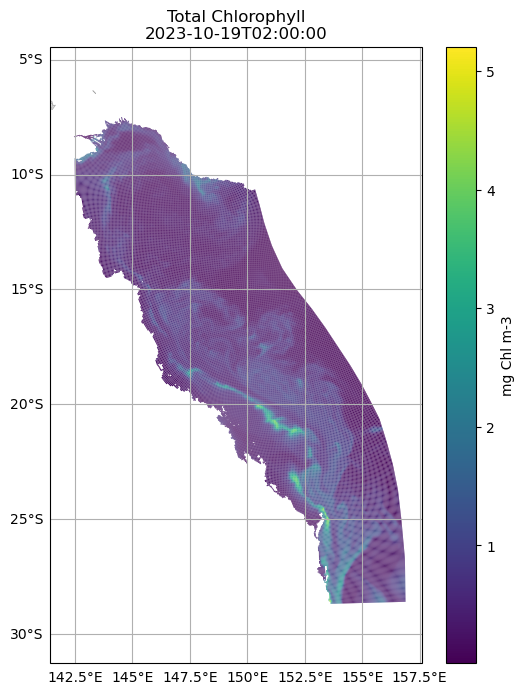

In [5]:
import cartopy
import numpy

# Set up the figure
chl_figure = pyplot.figure(figsize=(6, 8))
axes = chl_figure.add_subplot(projection=cartopy.crs.PlateCarree())
axes.set_aspect('equal', adjustable='datalim')

# Add the total chlorophyll variable to the figure
chl = dataset.ems.make_poly_collection('Chl_a_sum')
axes.add_collection(chl)
axes.autoscale()
axes.set_title(f"Total Chlorophyll\n{numpy.datetime_as_string(dataset['time'].values, 's')}")
chl_figure.colorbar(chl, label='mg Chl m-3')

# Add a coastline overlay
emsarray.plot.add_coast(axes, zorder=1)

# Add gridlines
axes.gridlines(draw_labels=['left', 'bottom'])

# Render the figure
chl_figure.show()

## Zoom in to an area of interest

Make a figure similar to the one above that displays the [Secchi depth](http://vocab.nerc.ac.uk/collection/P07/current/CFV13N21/) for the region around Mackay and also adds some landmarks:

/opt/conda/envs/notebooks/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhs/latest/gshhg-shp-2.3.7.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


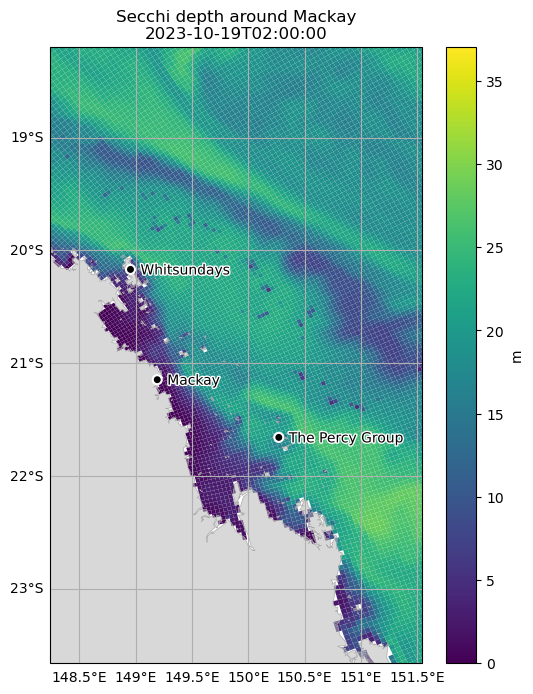

In [6]:
# We'll need an extra library for this one
import shapely

# Set up the figure
mackay_figure = pyplot.figure(figsize=(6, 8), dpi=100)
mackay_axes = mackay_figure.add_subplot(projection=cartopy.crs.PlateCarree())
mackay_axes.set_aspect('equal', adjustable='datalim')

# Add the Secchi depth variable
secchi = dataset.ems.make_poly_collection('Secchi')
mackay_axes.add_collection(secchi)
mackay_axes.autoscale()
mackay_axes.set_title(f"Secchi depth around Mackay\n{numpy.datetime_as_string(dataset['time'].values, 's')}")
mackay_figure.colorbar(secchi, label='m')

# Zoom in to the area around Mackay on the area of interest
# (autoscale undoes that, so we do this after that)
mackay_axes.set_extent((148.245710, 151.544167, -19.870197, -21.986412))

# Add a coastline overlay
emsarray.plot.add_coast(mackay_axes, zorder=1)

# Add gridlines
mackay_axes.gridlines(draw_labels=['left', 'bottom'])

# Add annotations for some landmark locations
emsarray.plot.add_landmarks(mackay_axes, [
    ('The Percy Group', shapely.Point(150.270579, -21.658269)),
    ('Whitsundays', shapely.Point(148.955319, -20.169076)),
    ('Mackay', shapely.Point(149.192671, -21.146719)),
])

# Render the figure
mackay_figure.show()